In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
cd_data = pd.read_csv("CO2 Emissions_Canada.csv")
cd_data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
print("Data type: ", type(cd_data))
print("Data dims: ", cd_data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (7385, 12)


In [5]:
print(cd_data.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


## Data Cleaning


We are interested in finding out the relationship between Transmission type and C02 Emissions. However, the Transmission type categorical variable has 2 aspects- the letters (e.g. A, AM etc) which stand for the Transmission type, and the numbers in some of the data which stand for the number of gears each Transmission type uses. However, same Transmission types can have different number of gears. We will create a new column "Gears" to do an analysis to determine if the number of gears is a significant variable in determining the CO2 Emissions(g/km). From data description file, number of gears ranges from 3 - 10.

In [6]:
cd_data["Gears"] = None

for row in range(len(cd_data)):
    for character in cd_data.iloc[row, 5]:
        if character.isdigit() and character == '1':
            cd_data.at[row, "Gears"] = 10
            break
        elif character.isdigit():
            cd_data.at[row, "Gears"] = int(character)
cd_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,8
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,8
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,8
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,8


In [7]:
print("Data type: ", type(cd_data))
print("Data dims: ", cd_data.shape)

Data type:  <class 'pandas.core.frame.DataFrame'>
Data dims:  (7385, 13)


In [8]:
print(cd_data.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
Gears                                object
dtype: object


Checking for NULL values in the new "Gears" column

In [9]:
cd_data.isnull().sum()

Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)           0
CO2 Emissions(g/km)                   0
Gears                               295
dtype: int64

Based on our research, the rows with NULL value in "Gears" column are the vehicles with an AV transmission (i.e. continuously variable transmission). These cars do not have a set number of gears as compared to other normal automatic transmission cars, but instead has 1 special gear that is variable for all driving conditions. So, to clean up the dataset and to ensure each row has a corresponding Gear value, we will replace all NULL values with the value 1. 

In [10]:
cd_data["Gears"].fillna(value=1, inplace=True)

In [11]:
cd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  Gears 

In [12]:
print(cd_data["Gears"].dropna().value_counts())

Gears
6     3259
8     1802
7     1026
9      419
5      307
1      295
10     210
4       67
Name: count, dtype: int64


Now that the "Gears" column has been cleaned up, we will do an analysis on the "Gears" variable with respect to the "CO2 Emissions (g/km)" variable, to determine if the number of gears is a significant variable in predicting the amount of CO2 emissions of a car. 

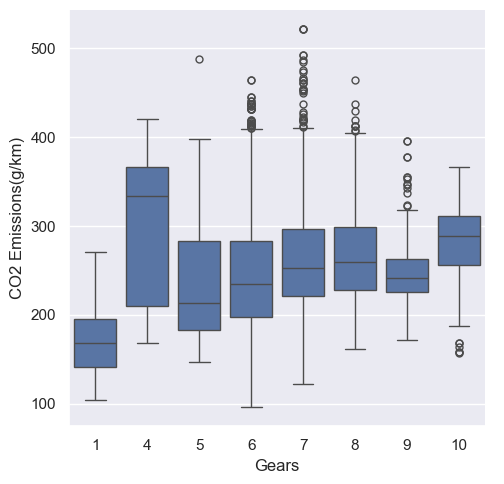

In [13]:
sb.catplot(data=cd_data, x="Gears", y="CO2 Emissions(g/km)", kind='box')

<Axes: xlabel='Gears', ylabel='CO2 Emissions(g/km)'>

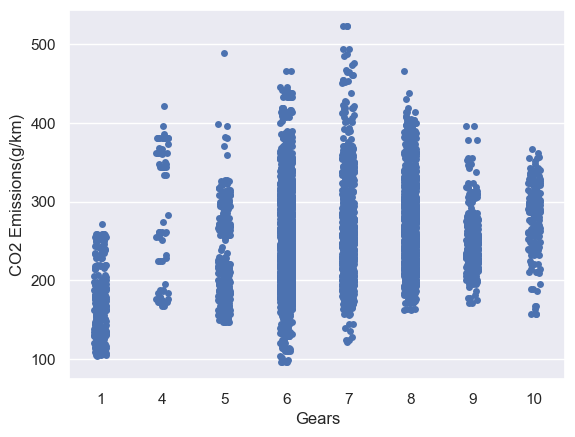

In [14]:
sb.stripplot(data=cd_data, x="Gears", y="CO2 Emissions(g/km)")

In [ ]:
#how to justify if gears is significant though? Do we use SelectKBest? This justification should be done before 
# we do the regression right or am i wrong? 

We will also create a new Transmission Type column (A, AM, AS, AV, M) to do a separate analysis using the Transmission type of the car. 

In [24]:
cd_data["Transmission Type"] = None
for row in range(len(cd_data)):
    for characters in cd_data.iloc[row, 5]:
        if characters.isalpha():
            if cd_data.at[row, "Transmission Type"] == None:
                cd_data.at[row, "Transmission Type"] = characters
            else:
                cd_data.at[row, "Transmission Type"] += characters
        elif characters.isdigit():
            break
cd_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears,Transmission Type
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,5,AS
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,6,M
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,7,AV
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,6,AS
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,6,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,8,AS
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,8,AS
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,8,AS
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,8,AS


In [15]:
cd_data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Gears                               0
dtype: int64

## Data Exploration

Next, we will do a univariate exploration of some variables that we would like to use in our numeric prediction
of the CO2 emissions of a car. These variables are namely: Vehicle Class (Categorical), Engine Size (L) (Numeric), Cylinders (Categorical), Fuel Type (Categorical), Fuel Consumption Comb (L/100km) (Numeric) and Gears (Categorical), Transmission Type (Categorical).

### We will first start off with the Numeric Variables (Engine Size and Fuel Consumption Comb). 

In [16]:
cd_data["Engine Size(L)"].describe()

count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

Note that the data provided has some similar features, namely Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km)and Fuel Consumption Comb (mpg). Upon researching into these data, we found that the first 2 features simply mean the amount (in Litres) of fuel consumed by the car for every 100km in cities and on highways respectively. The third feature (Fuel Consumption Comb (L/100 km)) is the weighted sum of the first 2 columns, based on how frequent cars spend on roads in the city vs the highway (55% in cities and 45% in highways). The last feature simply converts units of fuel consumption from Litre per 100km, to miles per imperial gallon.

Hence, out of these 4 features, we chose Fuel Consumption Comb (L/100 km) as it paints the most accurate picture of the fuel consumption of each car, and is presented in metric units which makes it easier for us and our client to understand and derive insights from.

In [17]:
cd_data["Fuel Consumption Comb (L/100 km)"].describe()

count    7385.000000
mean       10.975071
std         2.892506
min         4.100000
25%         8.900000
50%        10.600000
75%        12.600000
max        26.100000
Name: Fuel Consumption Comb (L/100 km), dtype: float64

<Axes: xlabel='Fuel Consumption Comb (L/100 km)'>

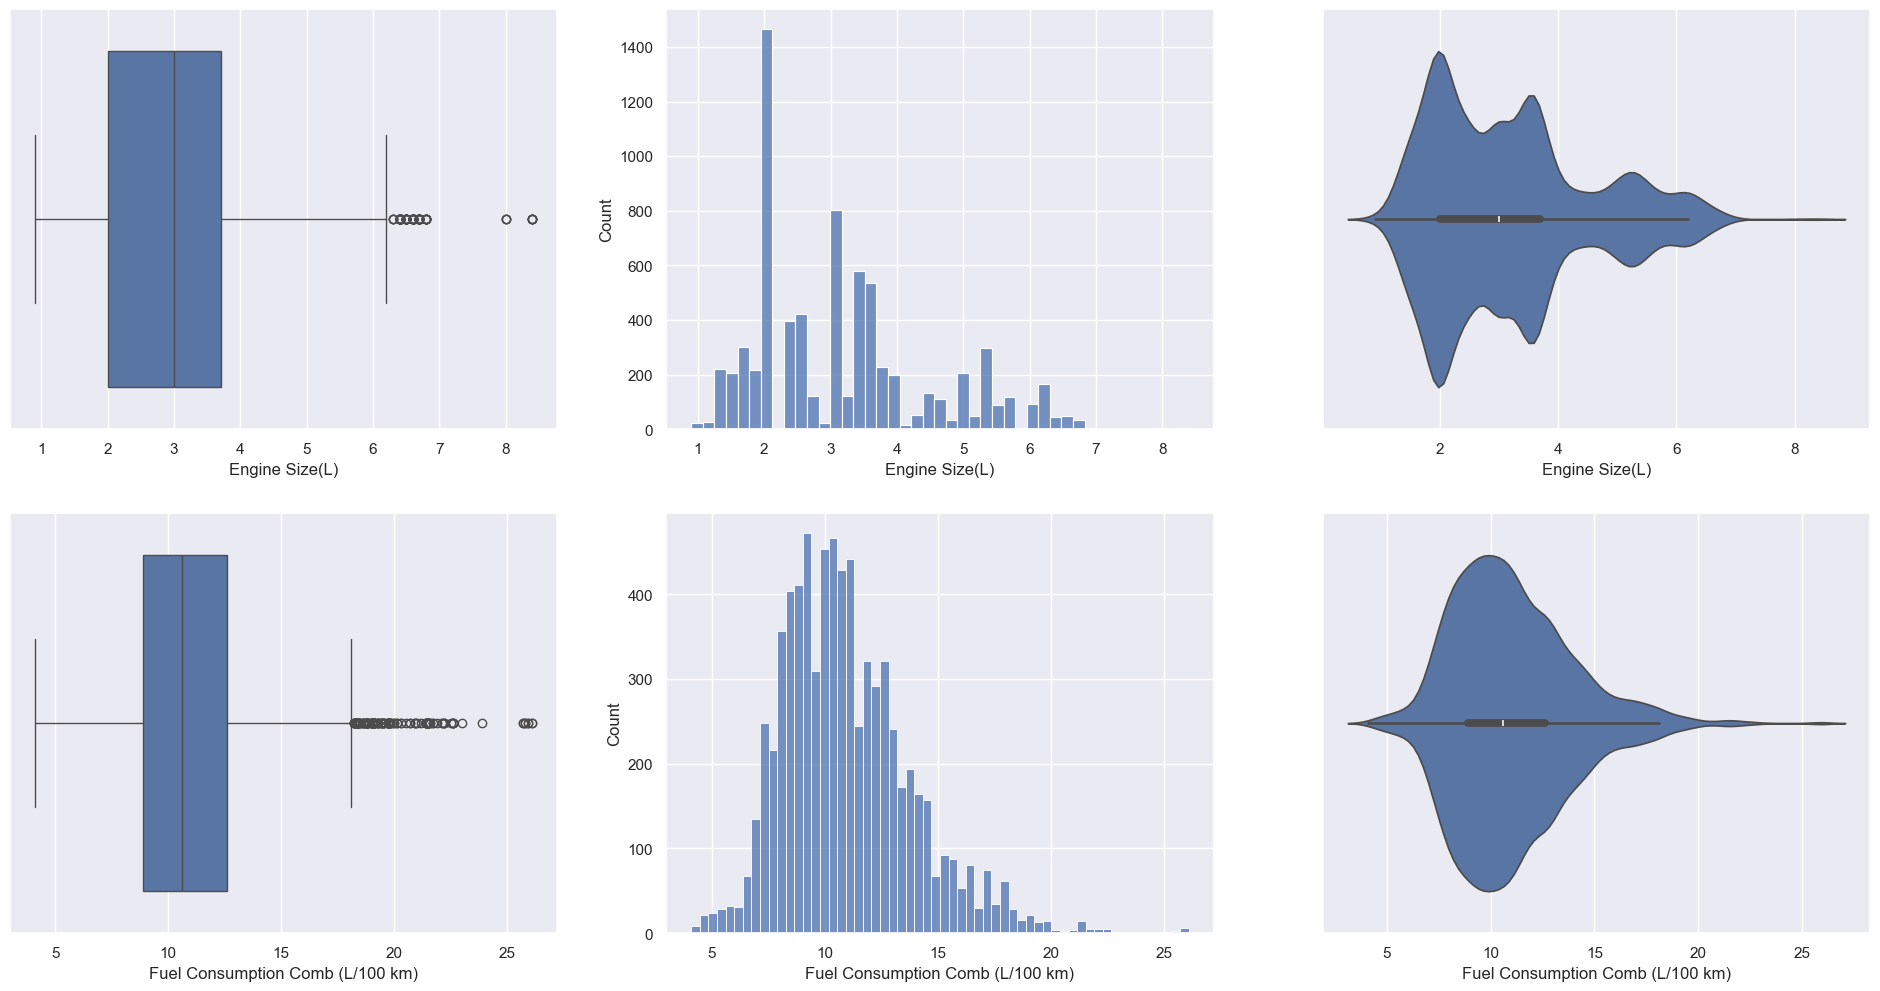

In [29]:
f, axes = plt.subplots(2, 3, figsize = (24, 12))
sb.boxplot(data=cd_data["Engine Size(L)"], orient='h', ax=axes[0,0])
sb.histplot(data=cd_data["Engine Size(L)"], ax=axes[0,1])
sb.violinplot(data=cd_data["Engine Size(L)"], orient='h', ax=axes[0,2])

sb.boxplot(data=cd_data["Fuel Consumption Comb (L/100 km)"], orient='h', ax=axes[1,0])
sb.histplot(data=cd_data["Fuel Consumption Comb (L/100 km)"], ax=axes[1,1])
sb.violinplot(data=cd_data["Fuel Consumption Comb (L/100 km)"], orient='h', ax=axes[1,2])

Accounting for skew of each numeric variable:

In [31]:
print("The skew for Engine Size: ", cd_data["Engine Size(L)"].skew())
print("The skew for Fuel Consumption Comb: ", cd_data["Fuel Consumption Comb (L/100 km)"].skew())

The skew for Engine Size:  0.8091809893113103
The skew for Fuel Consumption Comb:  0.893315721747063


### Next, we will do a univariate exploration of the categorical variables (Vehicle Class, Cylinders, Fuel Type, Gears, Transmission Type)

In [19]:
cd_data["Vehicle Class"].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

In [20]:
cd_data["Cylinders"].value_counts()

Cylinders
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: count, dtype: int64

In [21]:
cd_data["Fuel Type"].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [22]:
cd_data["Gears"].value_counts()

Gears
6     3259
8     1802
7     1026
9      419
5      307
1      295
10     210
4       67
Name: count, dtype: int64

In [25]:
cd_data["Transmission Type"].value_counts()

Transmission Type
AS    3127
A     1851
M     1185
AM     646
AV     576
Name: count, dtype: int64

c:\Users\davin\anaconda3\Lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
c:\Users\davin\anaconda3\Lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
c:\Users\davin\anaconda3\Lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
c:\Users\davin\anaconda3\Lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
c:\Users\davin\anaconda3\Lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept 

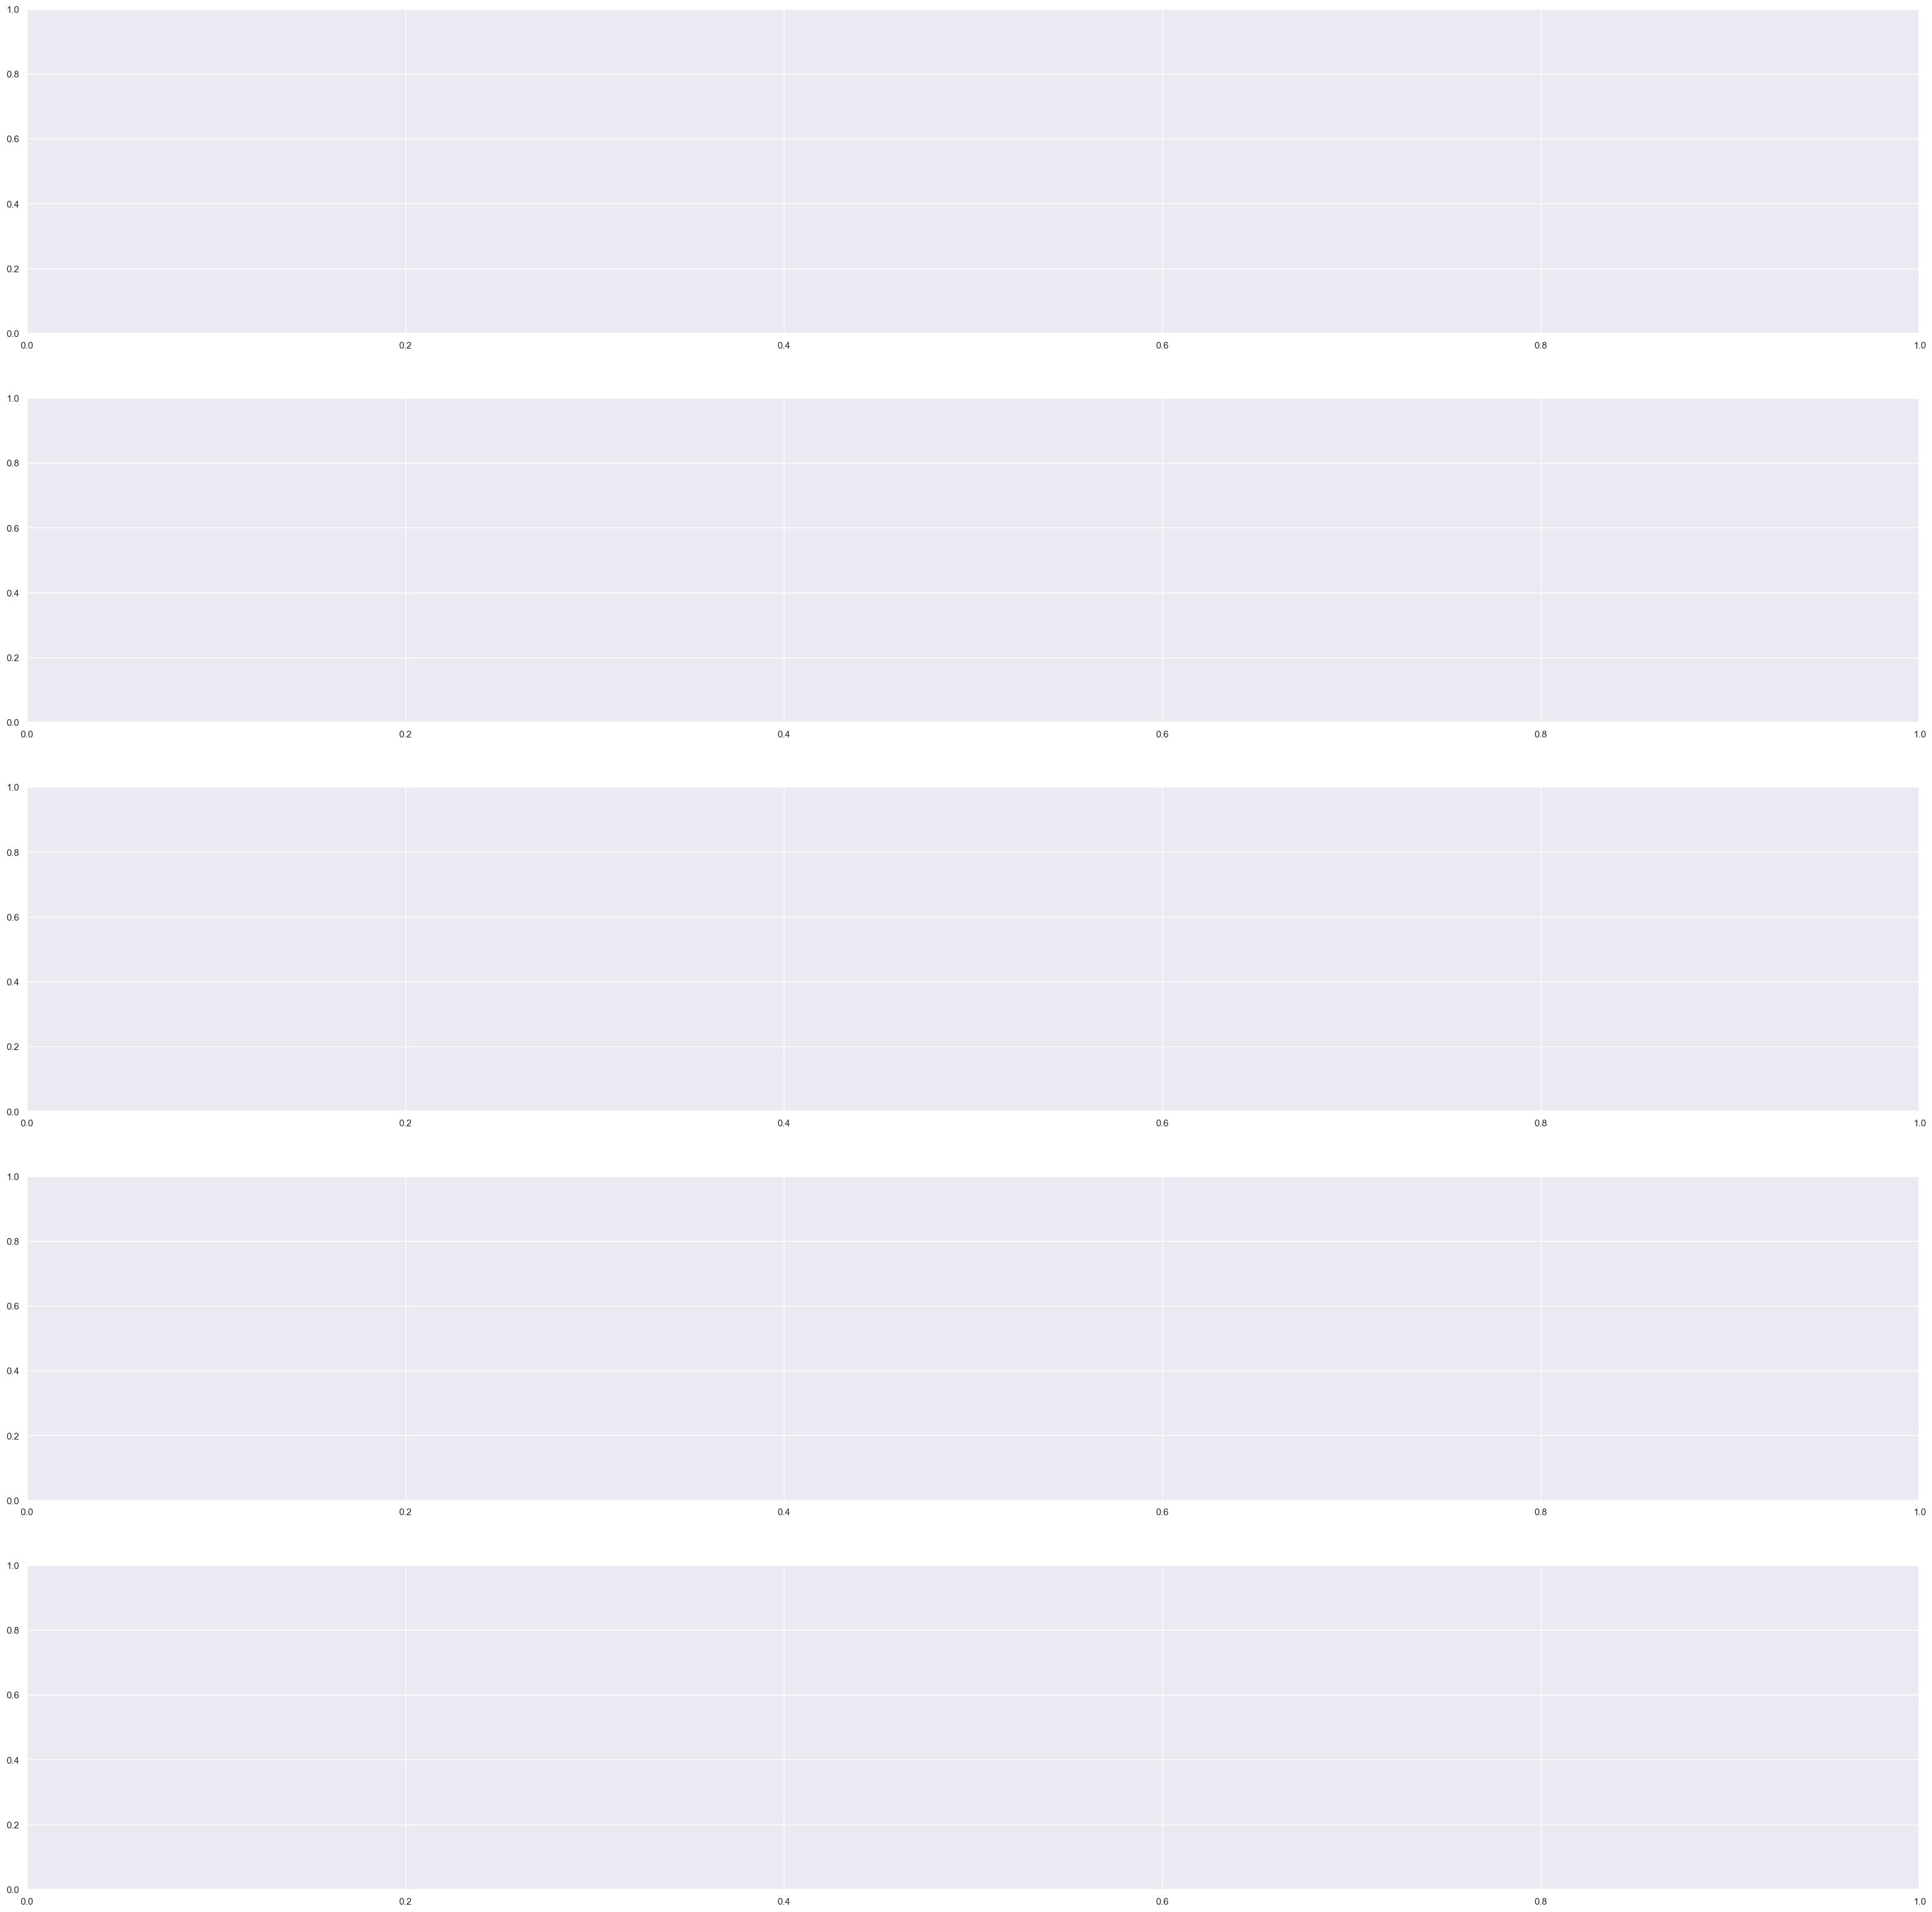

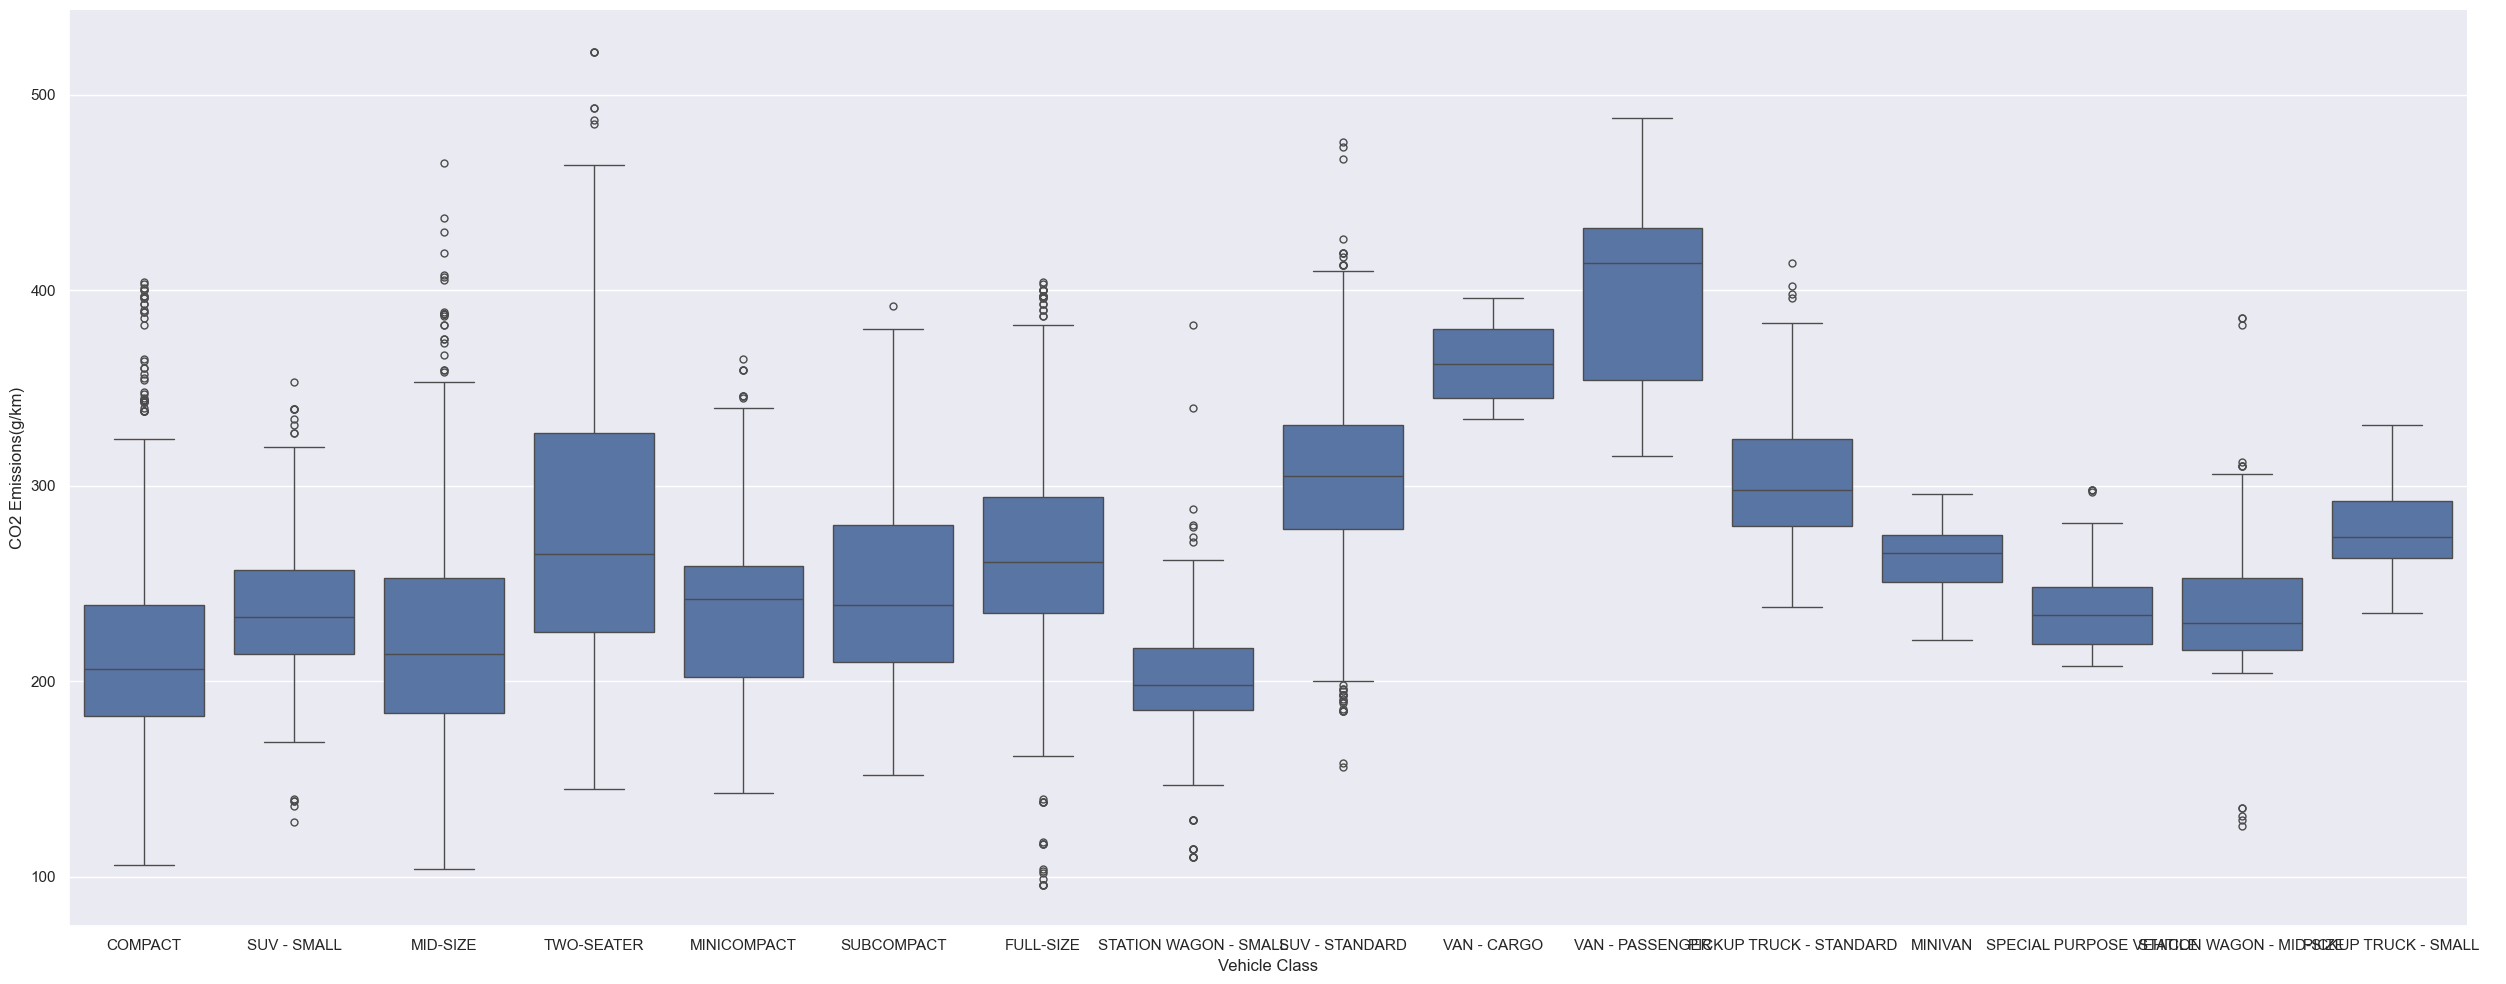

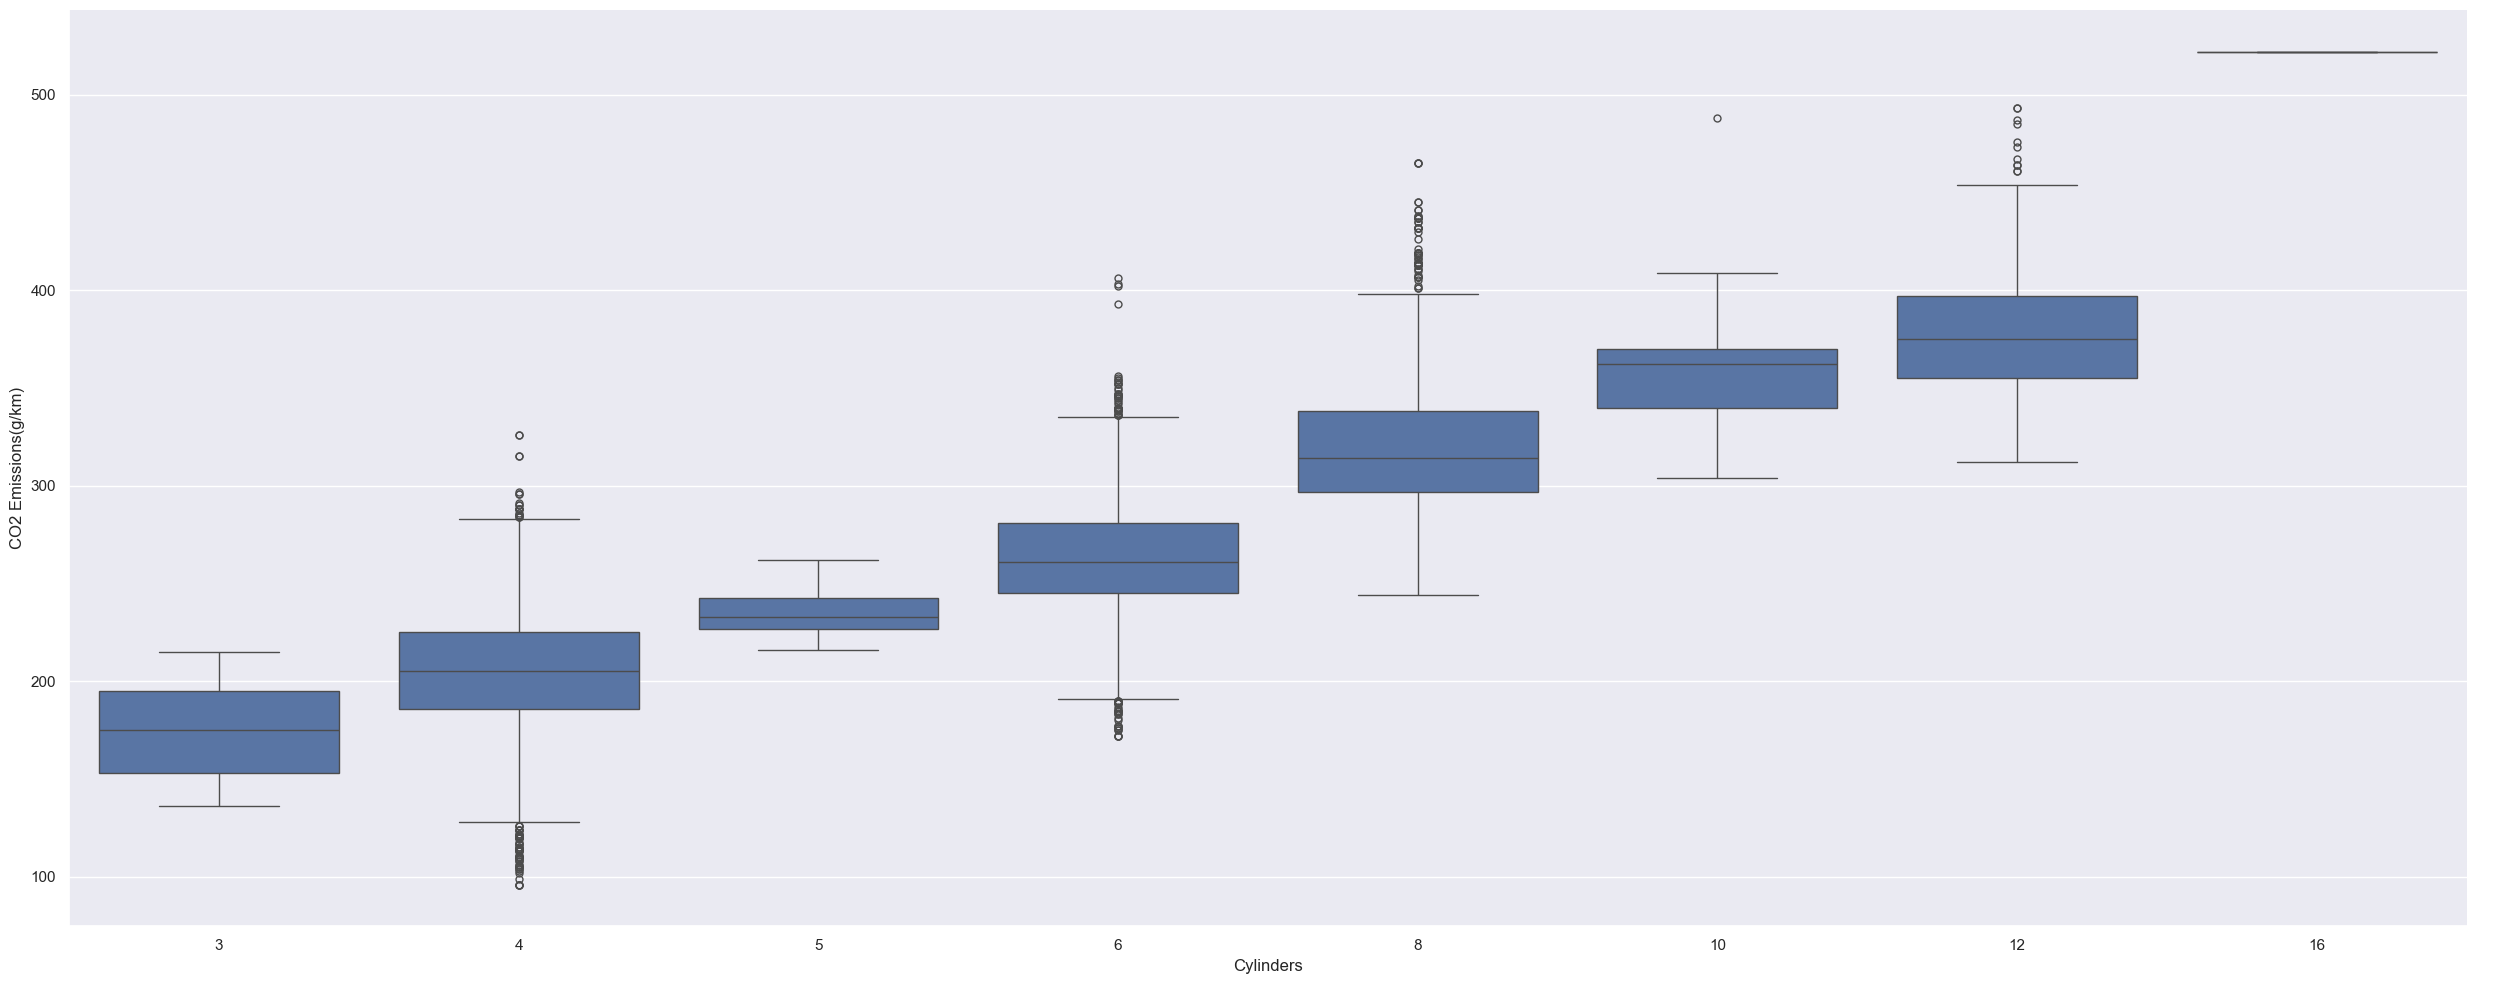

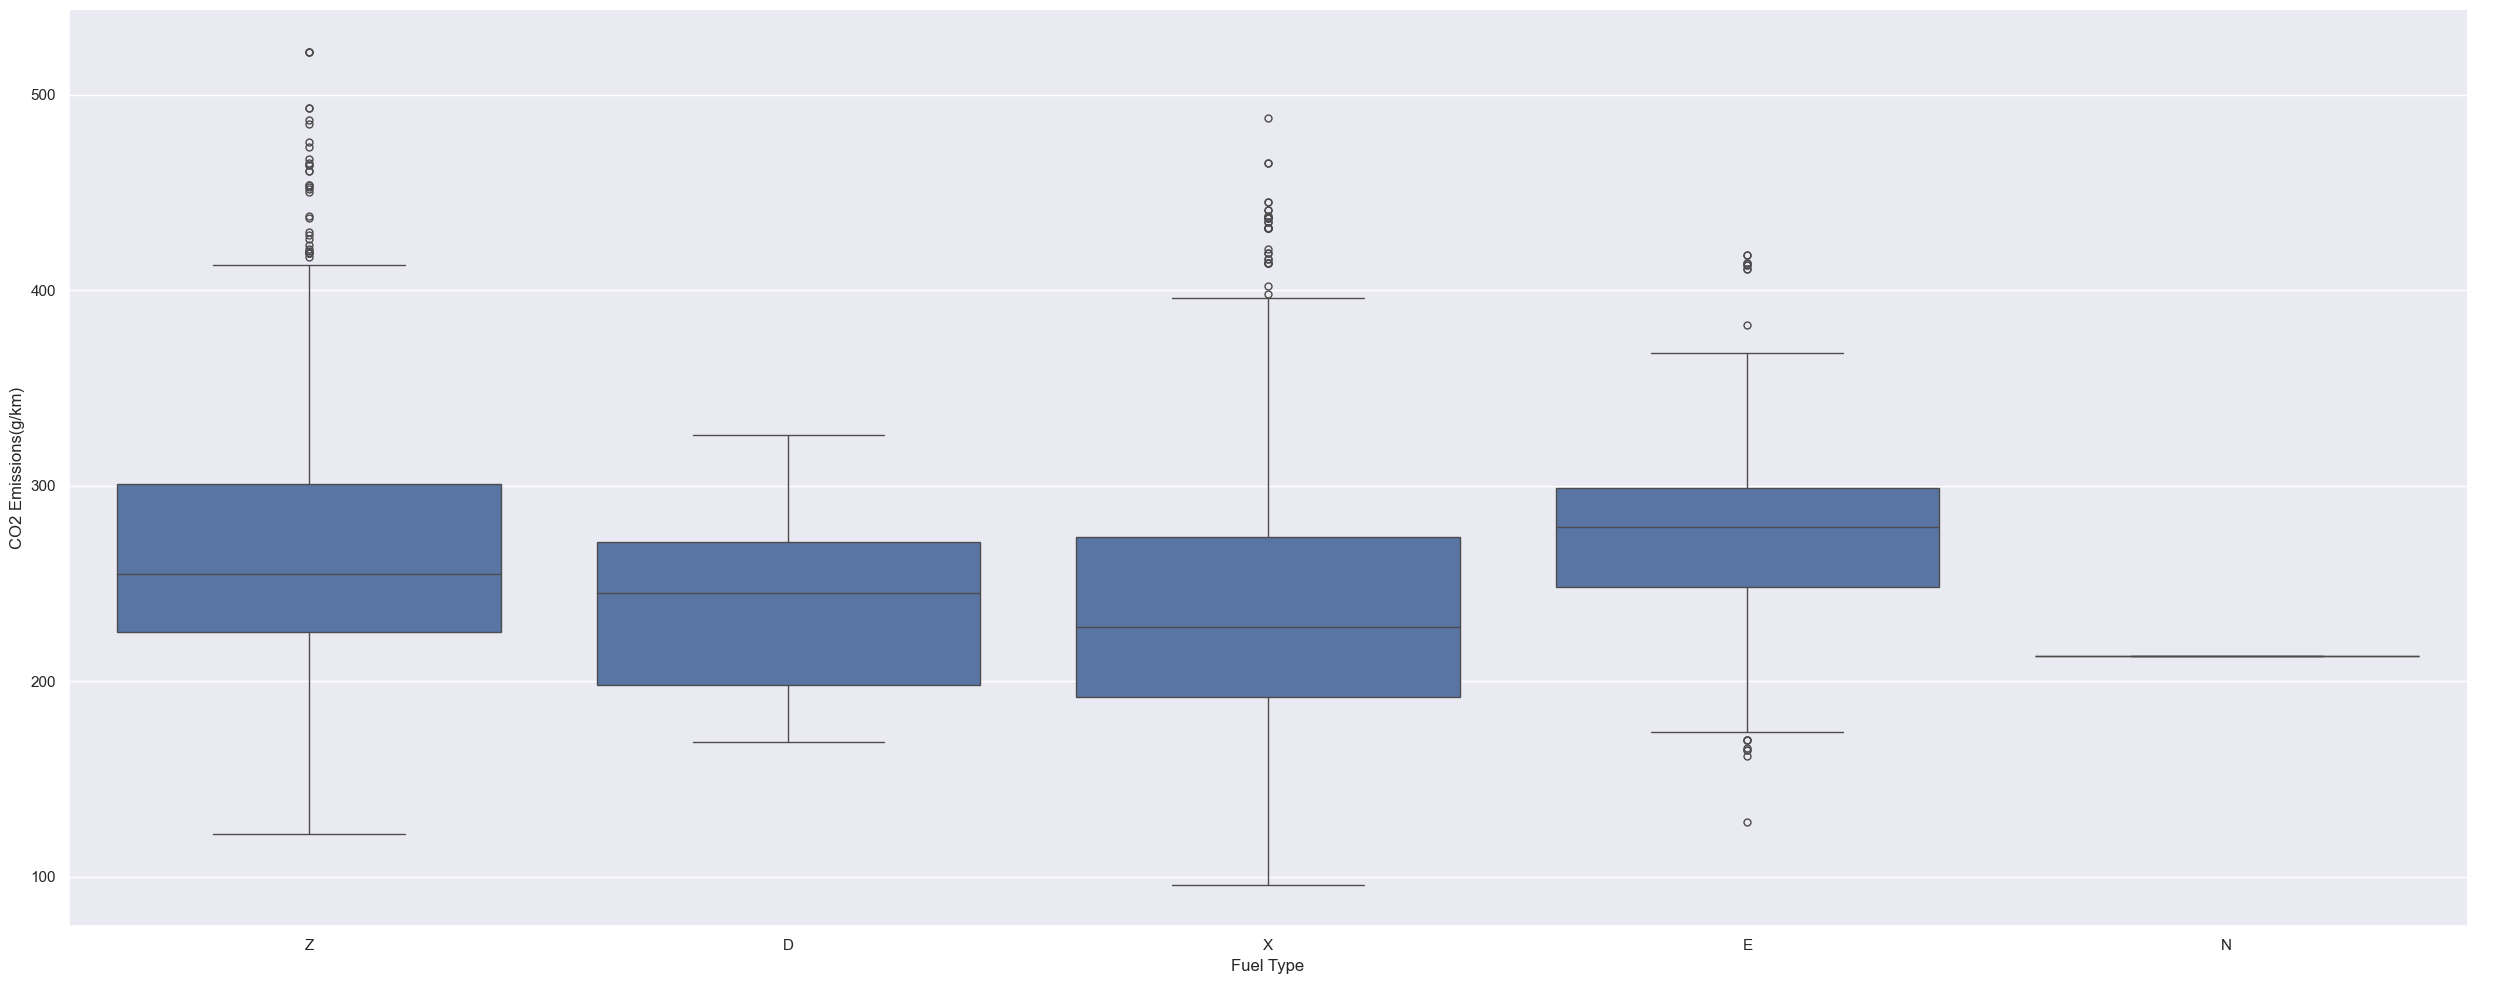

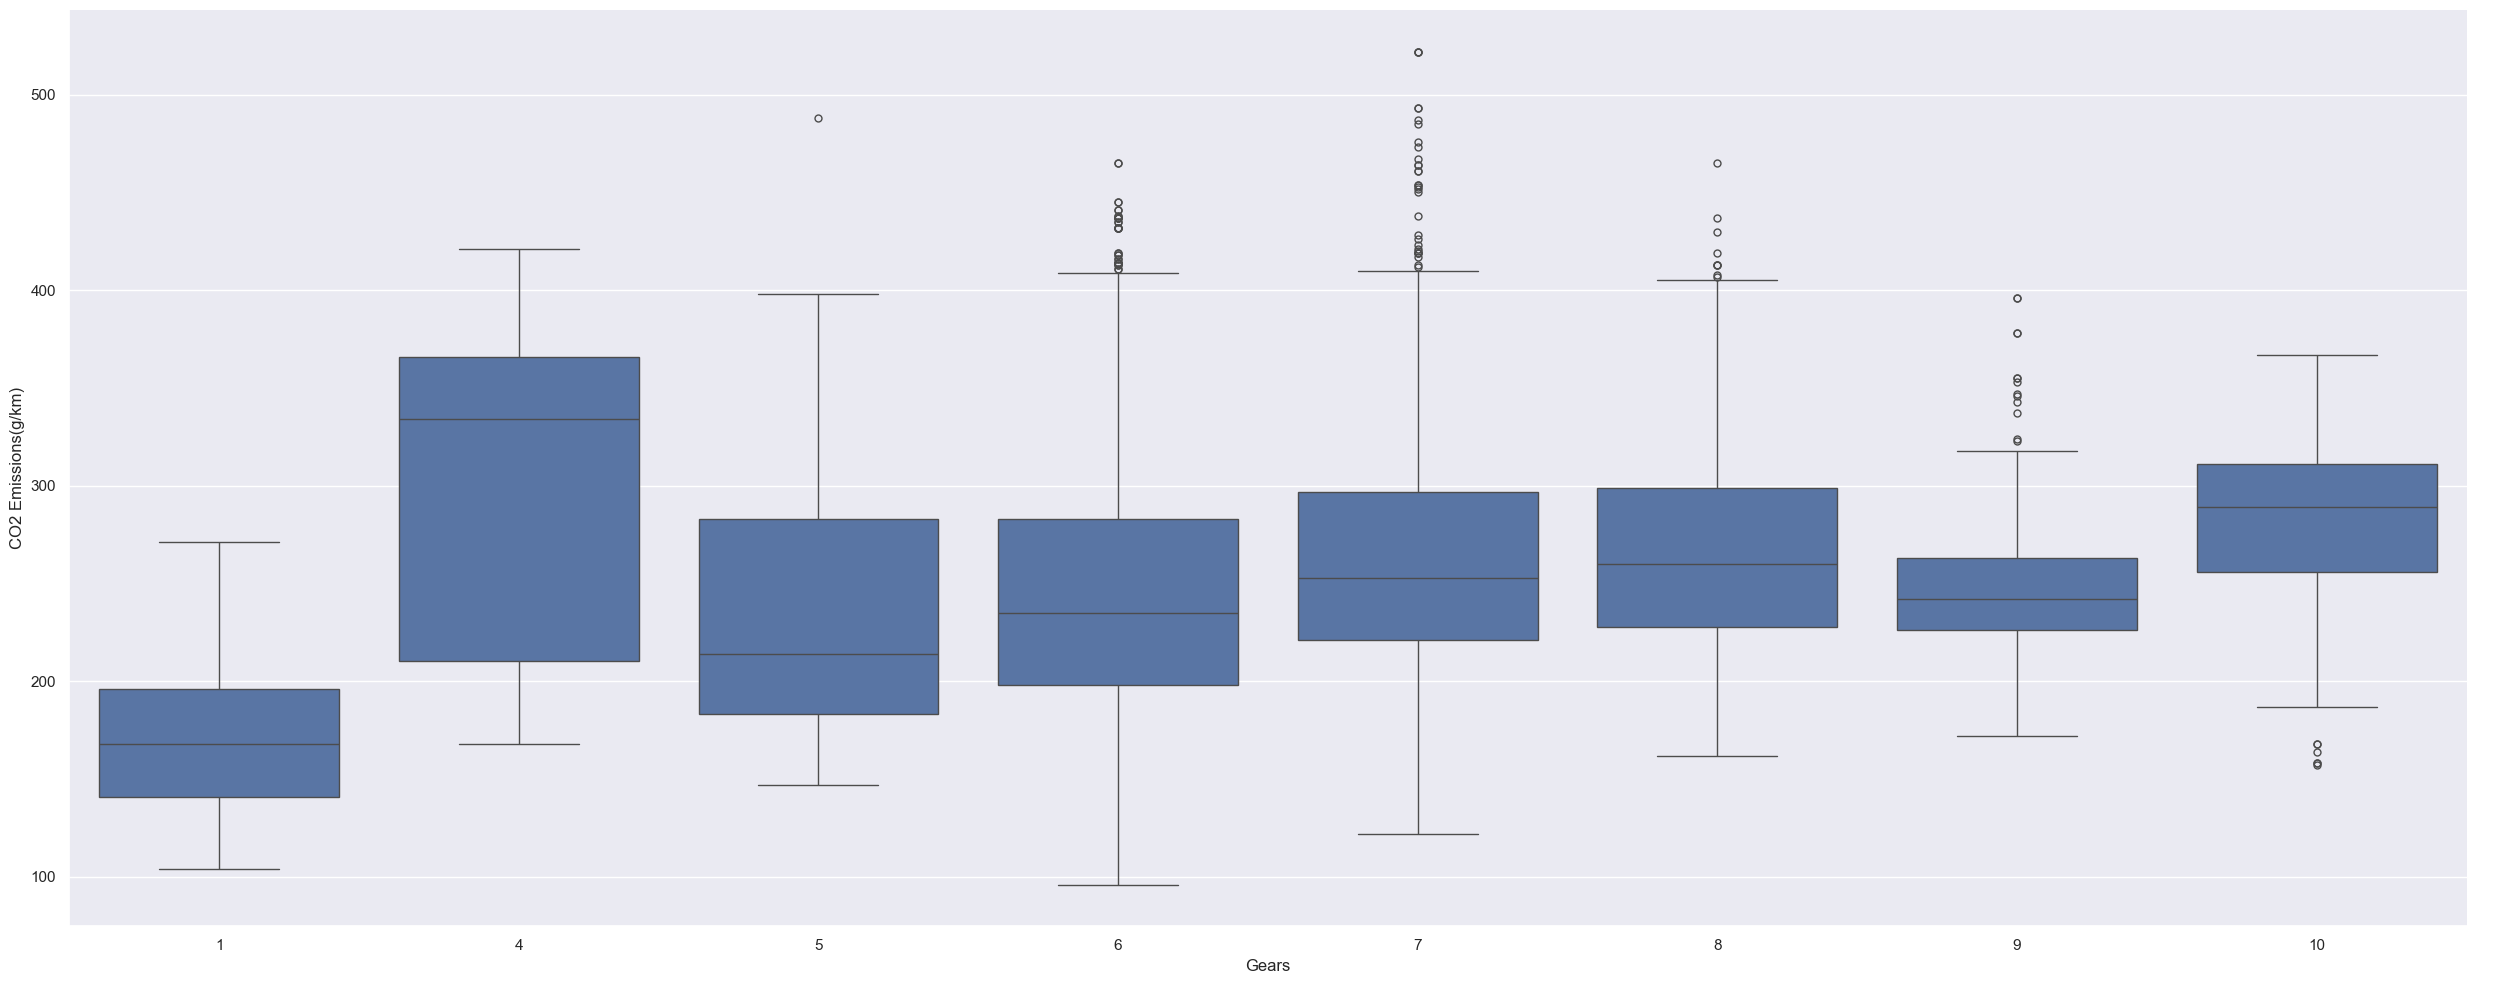

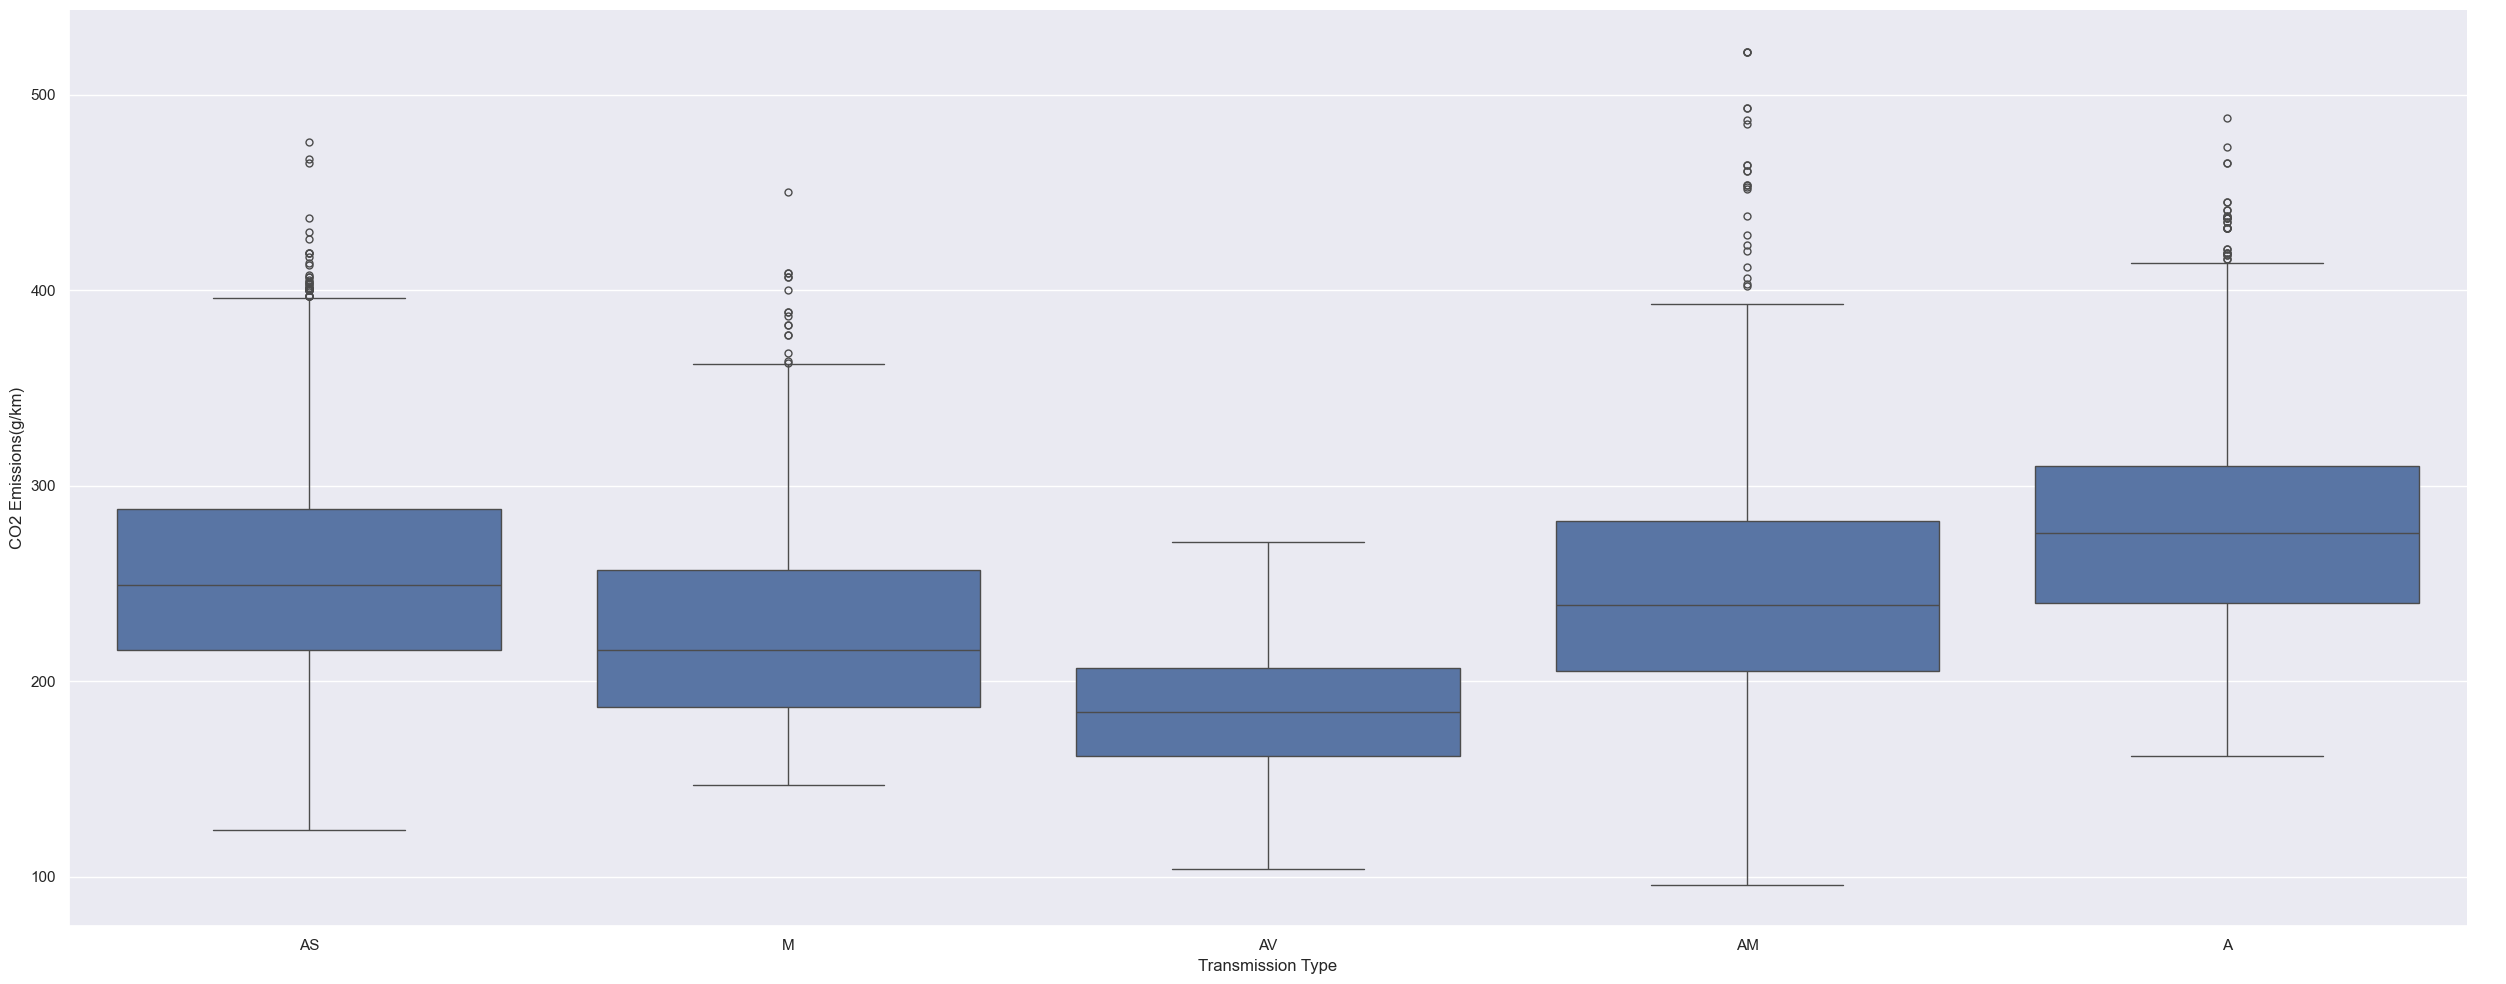

In [55]:
#out predictors are differemt? enginesize, fuelcomb, transmission type, fuel type, cylinders
f, axes = plt.subplots(5, 1, figsize=(40,40))
count = 0
list_var = ["Vehicle Class", "Cylinders", "Fuel Type", "Gears", "Transmission Type"]
for var in list_var:
    sb.catplot(data=cd_data, x=var, y="CO2 Emissions(g/km)", ax=axes[count], height = 10, aspect=2.5, kind='box')
    count += 1


## Bivariate analysis
We will now investigate the relationship between each of the 6 of our chosen predictor variables, and the result variable.

#### Engine Size vs CO2 Emissions

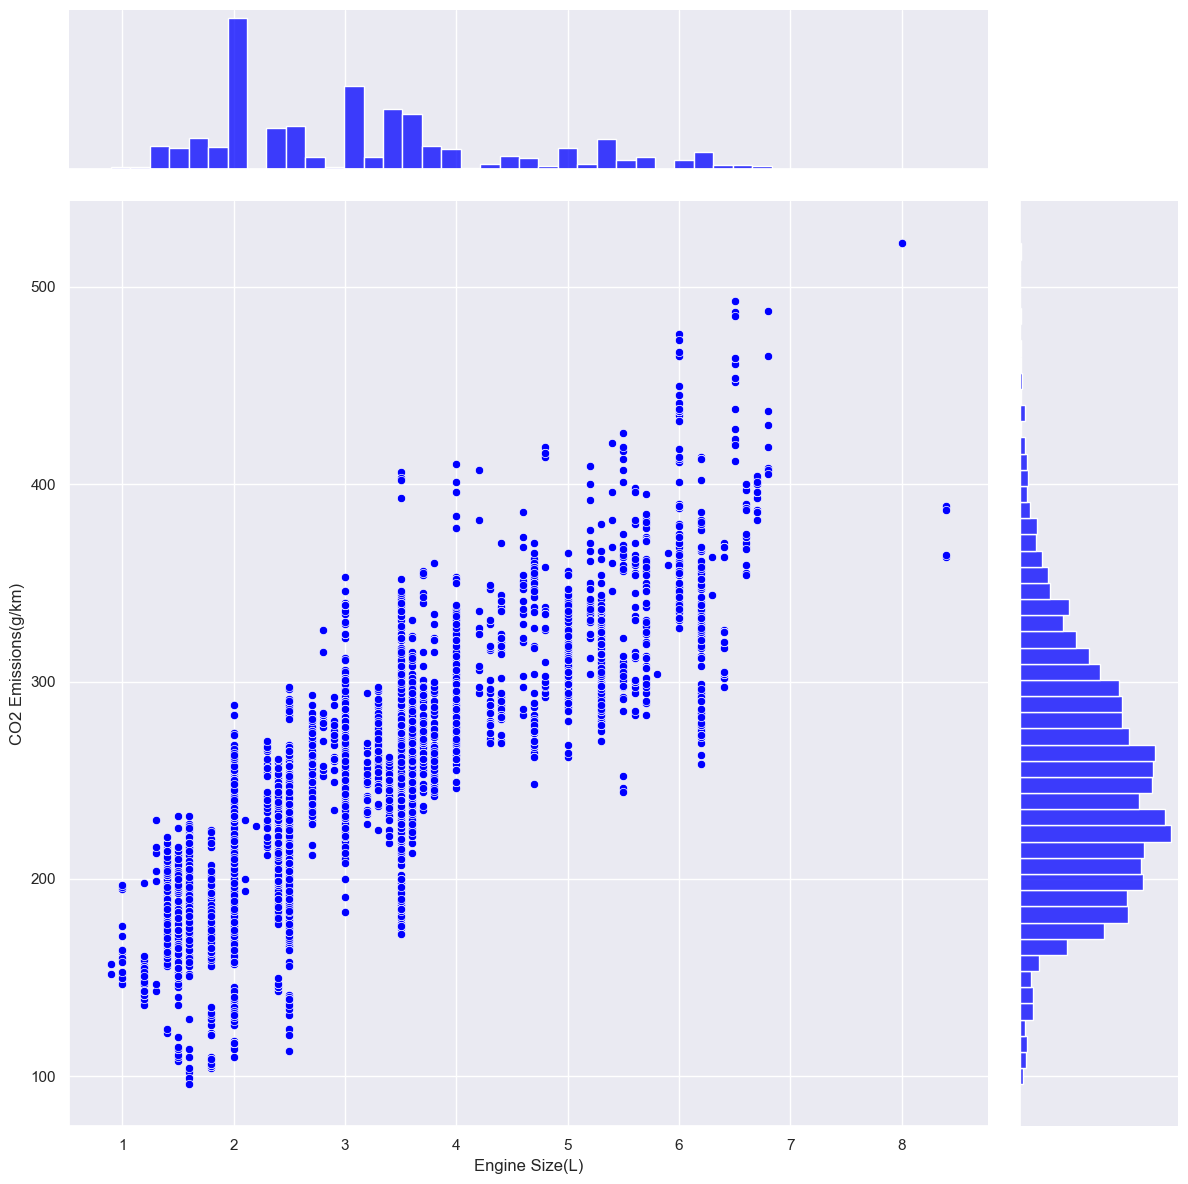

In [36]:
sb.jointplot(data = cd_data, x = "Engine Size(L)", y = "CO2 Emissions(g/km)", height = 12, color = "blue")

<Axes: >

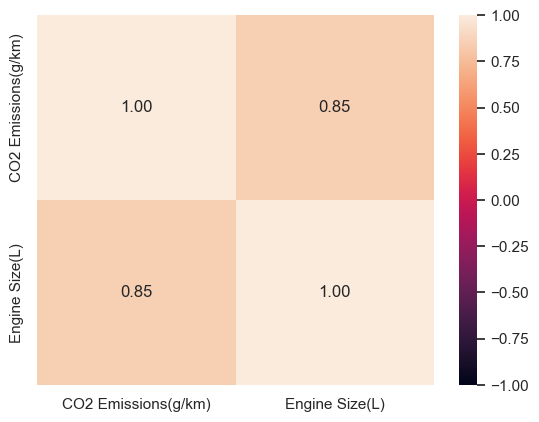

In [45]:

co2VSenginesizeDF = pd.concat([cd_data["CO2 Emissions(g/km)"], cd_data["Engine Size(L)"]], axis = 1).reindex(cd_data["CO2 Emissions(g/km)"].index)
sb.heatmap(data = co2VSenginesizeDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### Fuel Consumption Comb (L/100 km) vs CO2 Emissions

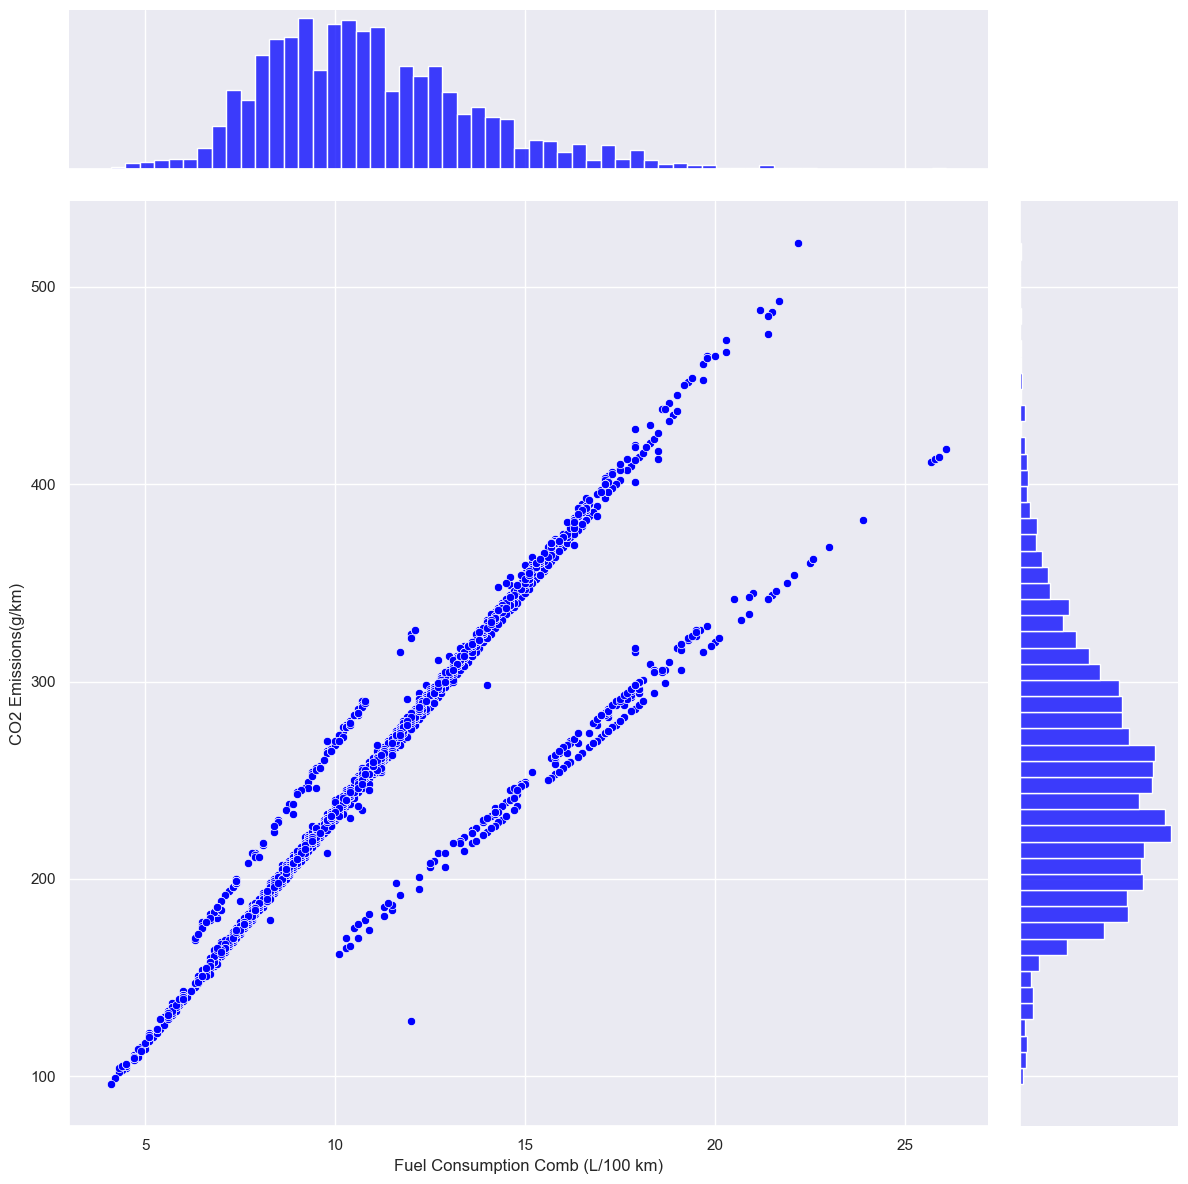

In [47]:
sb.jointplot(data = cd_data, x = "Fuel Consumption Comb (L/100 km)", y = "CO2 Emissions(g/km)", height = 12, color = "blue")
#erm something weird going on here

<Axes: >

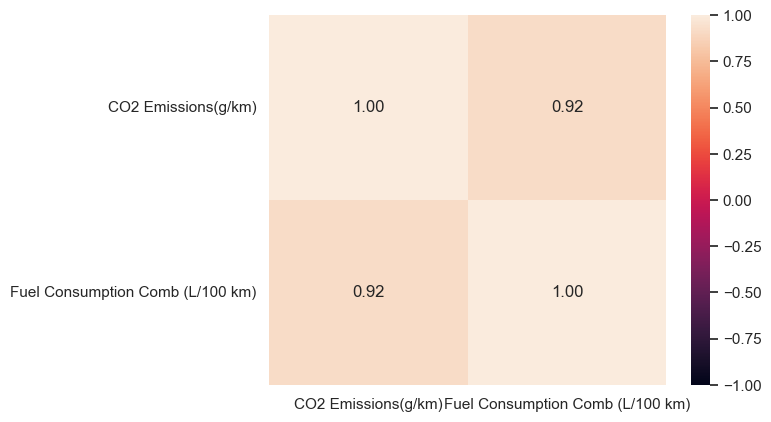

In [48]:

co2VSfuelconsumptionDF = pd.concat([cd_data["CO2 Emissions(g/km)"], cd_data["Fuel Consumption Comb (L/100 km)"]], axis = 1).reindex(cd_data["CO2 Emissions(g/km)"].index)
sb.heatmap(data = co2VSfuelconsumptionDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### Number of cylinders (categorical) vs CO2 Emissions

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

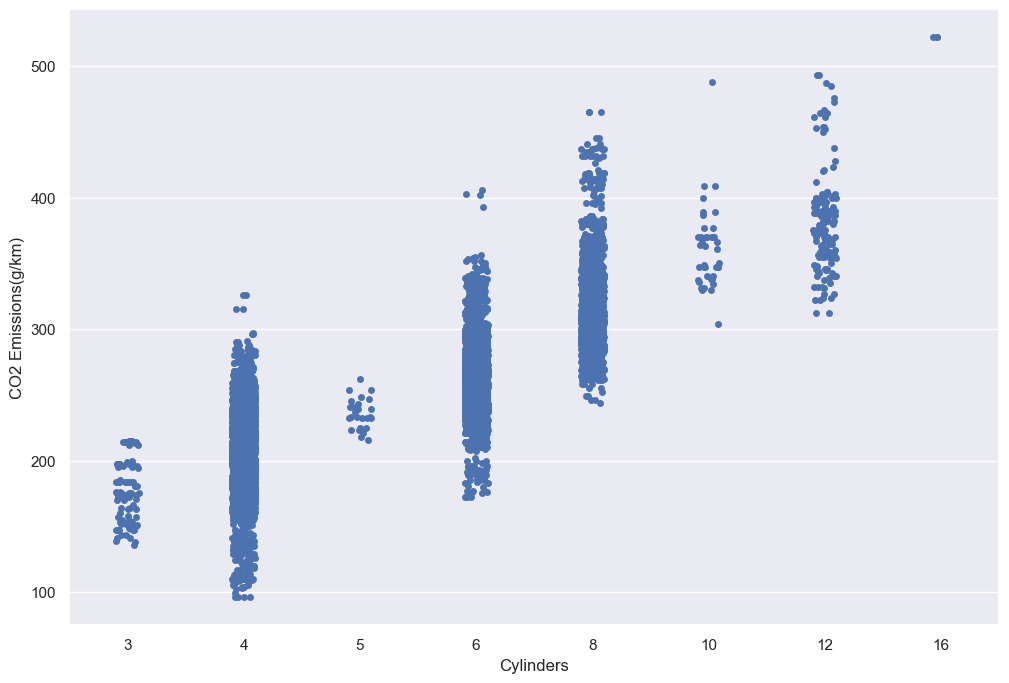

In [50]:
f = plt.figure(figsize=(12, 8))
sb.stripplot(x = 'Cylinders', y = 'CO2 Emissions(g/km)', data = cd_data)

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

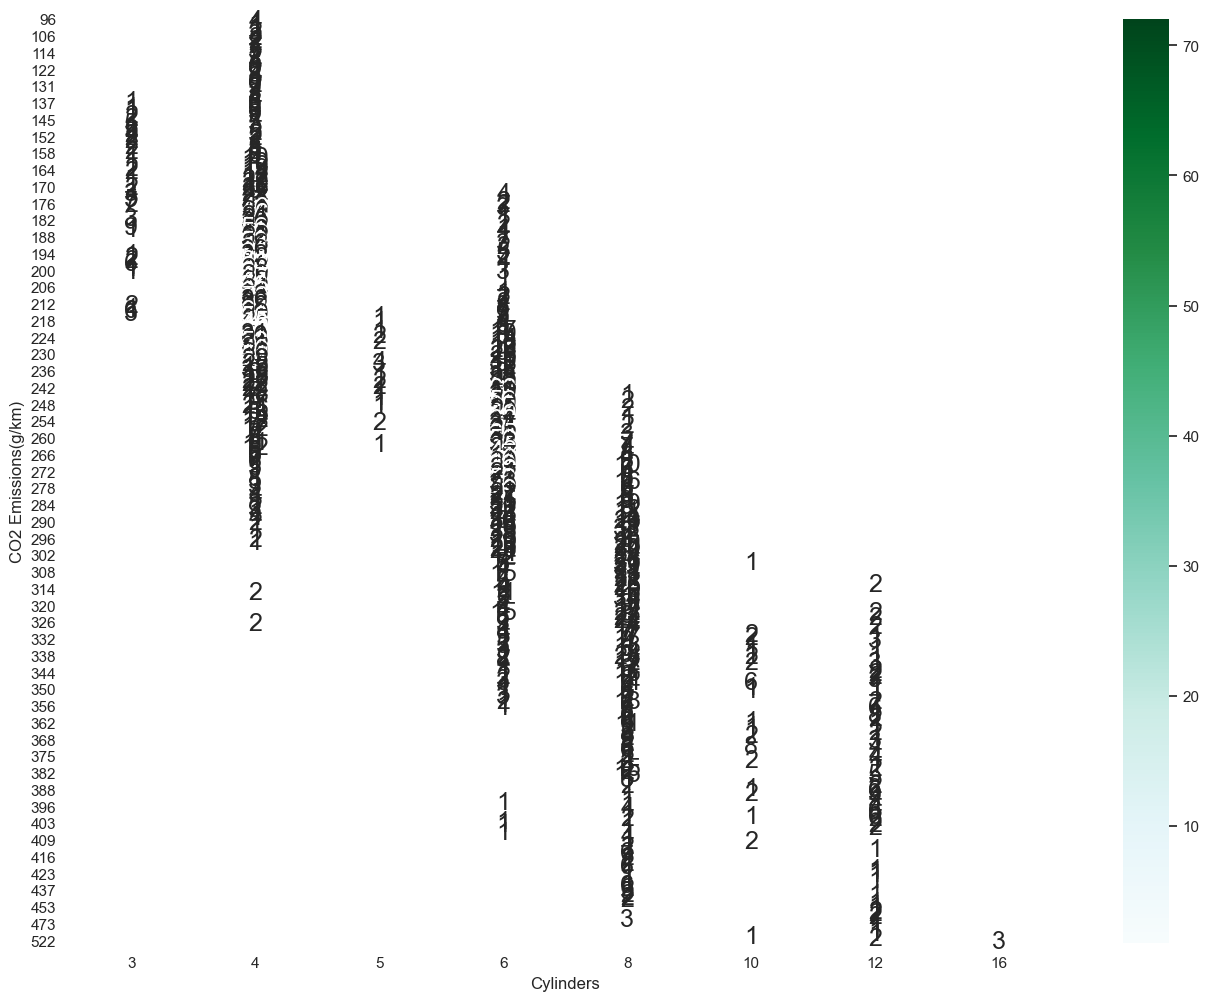

In [53]:
f = plt.figure(figsize=(16, 12))
sb.heatmap(cd_data.groupby([ 'CO2 Emissions(g/km)', 'Cylinders']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

#### Fuel Type vs CO2 Emissions

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

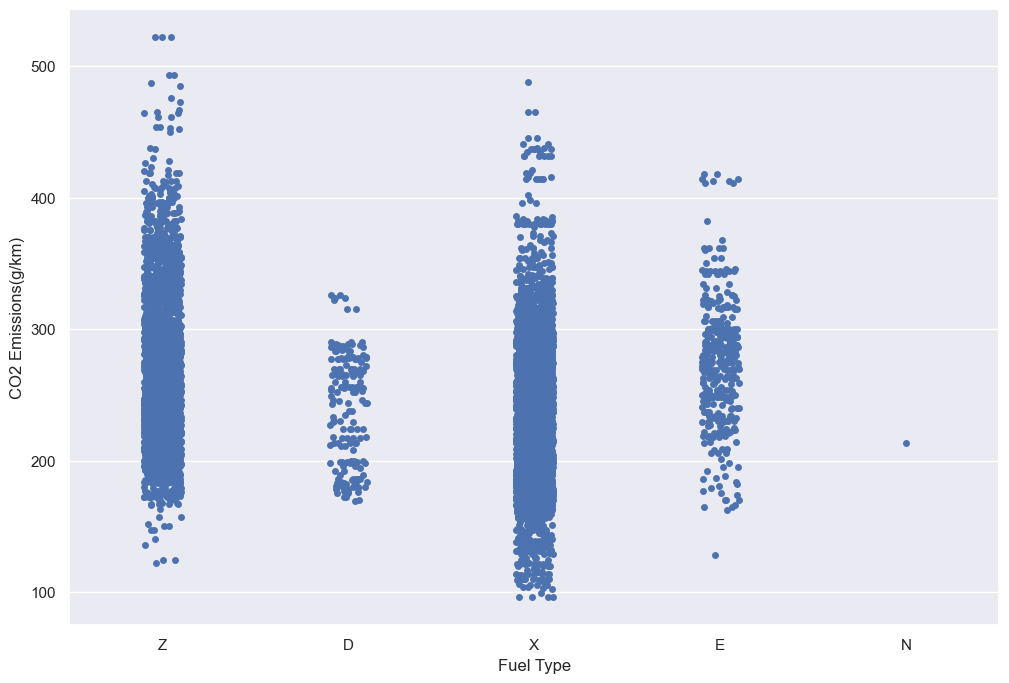

In [54]:
f = plt.figure(figsize=(12, 8))
sb.stripplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', data = cd_data)

#### Transmission type vs CO2 Emissions

<Axes: xlabel='Transmission Type', ylabel='CO2 Emissions(g/km)'>

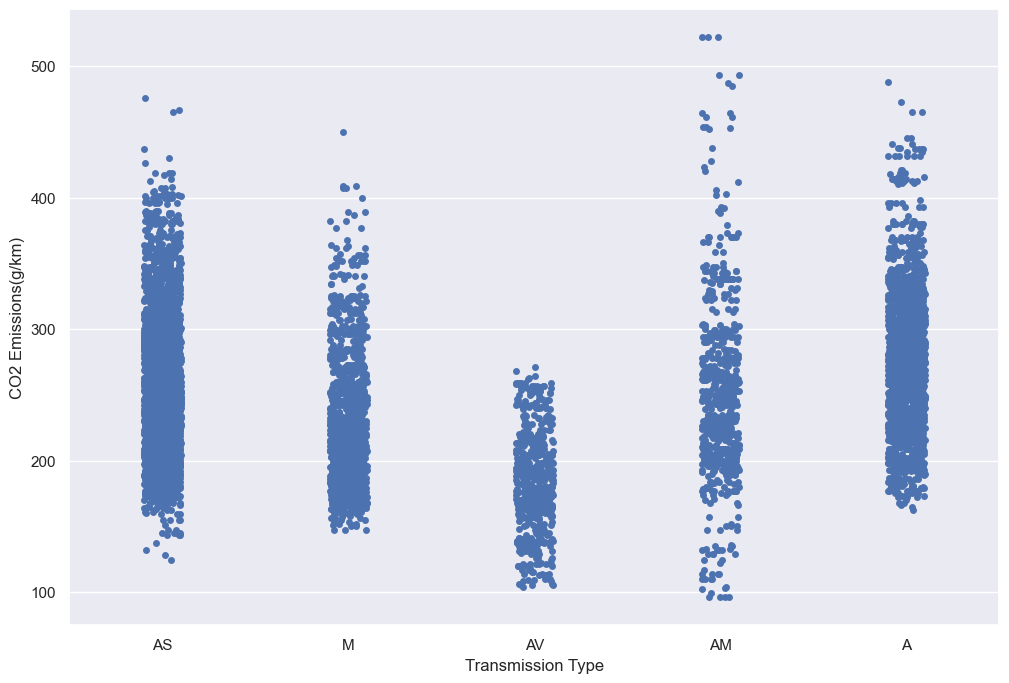

In [57]:
f = plt.figure(figsize=(12, 8))
sb.stripplot(x = 'Transmission Type', y = 'CO2 Emissions(g/km)', data = cd_data)